In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [115]:
os.getcwd()

'/Users/juank/Documents/Flatiron/phase_3/chicago_car_crashes'

In [116]:
os.listdir('data')

['crashes_vehicles.csv',
 '.crashes_people.csv.icloud',
 '.crashes_crashes.csv.icloud']

In [117]:
# crashes = pd.read_csv('data/crashes_crashes.csv')
vehicles = pd.read_csv('data/crashes_vehicles.csv')
# people = pd.read_csv('data/crashes_people.csv')

In [118]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629817 entries, 0 to 1629816
Data columns (total 71 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1629817 non-null  int64  
 1   CRASH_RECORD_ID           1629817 non-null  object 
 2   CRASH_DATE                1629817 non-null  object 
 3   UNIT_NO                   1629817 non-null  int64  
 4   UNIT_TYPE                 1627714 non-null  object 
 5   NUM_PASSENGERS            241187 non-null   float64
 6   VEHICLE_ID                1592521 non-null  float64
 7   CMRC_VEH_I                30341 non-null    object 
 8   MAKE                      1592516 non-null  object 
 9   MODEL                     1592371 non-null  object 
 10  LIC_PLATE_STATE           1446619 non-null  object 
 11  VEHICLE_YEAR              1336168 non-null  float64
 12  VEHICLE_DEFECT            1592521 non-null  object 
 13  VEHICLE_TYPE              1

## Drop columns with over a million NaNs

In [119]:
nan_count = vehicles.isna().sum()

useful_columns = nan_count[nan_count < 1_000_000].index
useful_columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'LIC_PLATE_STATE',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'FIRST_CONTACT_POINT'],
      dtype='object')

In [120]:
df = vehicles[useful_columns]
df.sample(10)

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
312623,1282028,9cd7f3d754b1e2ff23bb1492ec9f7a56cbdca298353913...,02/15/2022 12:50:00 PM,1,DRIVER,1217277.0,FORD,OTHER (EXPLAIN IN NARRATIVE),IL,2014.0,UNKNOWN,PICKUP,PERSONAL,W,BACKING,1.0,UNKNOWN
621264,1579868,1f9ed8daeeced062e3a60afcb01a3f1627dcfe36c27ee7...,05/17/2023 03:00:00 PM,1,DRIVER,1503088.0,CHEVROLET,SILVERADO,IL,2017.0,UNKNOWN,TRUCK - SINGLE UNIT,UNKNOWN/NA,W,PASSING/OVERTAKING,1.0,UNKNOWN
202899,1176969,3cd01fa18cea17f89fff105624036ab459f46b81b63e68...,09/05/2021 03:55:00 AM,1,DRIVER,1116541.0,CHEVROLET,MALIBU,IL,2013.0,NONE,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,1.0,FRONT-LEFT-CORNER
827519,22014,0dfb5e84dd2f1b107e39da5656792c8861cba41f434995...,01/09/2016 02:10:00 PM,1,DRIVER,21198.0,DODGE,CARAVAN,IL,2005.0,UNKNOWN,VAN/MINI-VAN,UNKNOWN/NA,E,BACKING,2.0,REAR-RIGHT
889391,28022,08e4960ec978f3fbef25a1561e7d228cda66d67829fd95...,02/01/2016 04:00:00 AM,1,DRIVER,27057.0,DODGE,DURANGO,XX,NaN,UNKNOWN,SPORT UTILITY VEHICLE (SUV),PERSONAL,S,STRAIGHT AHEAD,1.0,FRONT
470402,1434274,214b85e9f081b893ff7bf0a1a55c52afbf528908c8a84a...,10/05/2022 03:50:00 PM,2,DRIVER,1363061.0,TOYOTA,OTHER (EXPLAIN IN NARRATIVE),IL,2021.0,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,SIDE-LEFT
1185068,568301,227c25758c44dfcf6b23ffcb73ac6aca3f43ac09959aa5...,01/22/2019 12:30:00 AM,1,DRIVER,541965.0,UNKNOWN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,UNKNOWN,UNKNOWN/NA,1.0,UNKNOWN
156799,1132351,c179571e0772940bd7246d5f14bedc27a412ba1ac4430d...,07/03/2021 10:40:00 PM,2,DRIVER,1074107.0,HONDA,CIVIC,IL,2015.0,NONE,PASSENGER,PERSONAL,W,TURNING LEFT,2.0,REAR-RIGHT-CORNER
1116007,500665,90689b668af032db024f1948c9c32ea26ff3b94f26f153...,10/15/2018 10:45:00 PM,2,DRIVER,478723.0,LINCOLN-CONTINENTAL,MKX,IL,2013.0,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,SIDE-RIGHT
860396,252168,2486de0c47b0d28cfba4370c11e6accbc5581c19d2e625...,11/02/2017 11:06:00 AM,1,DRIVER,245728.0,COOK SEMI TRAILER,COOK SEMI TRAILER,IL,2015.0,NONE,TRUCK - SINGLE UNIT,COMMERCIAL - SINGLE UNIT,W,BACKING,1.0,REAR


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629817 entries, 0 to 1629816
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_UNIT_ID        1629817 non-null  int64  
 1   CRASH_RECORD_ID      1629817 non-null  object 
 2   CRASH_DATE           1629817 non-null  object 
 3   UNIT_NO              1629817 non-null  int64  
 4   UNIT_TYPE            1627714 non-null  object 
 5   VEHICLE_ID           1592521 non-null  float64
 6   MAKE                 1592516 non-null  object 
 7   MODEL                1592371 non-null  object 
 8   LIC_PLATE_STATE      1446619 non-null  object 
 9   VEHICLE_YEAR         1336168 non-null  float64
 10  VEHICLE_DEFECT       1592521 non-null  object 
 11  VEHICLE_TYPE         1592521 non-null  object 
 12  VEHICLE_USE          1592521 non-null  object 
 13  TRAVEL_DIRECTION     1592521 non-null  object 
 14  MANEUVER             1592521 non-null  object 
 15

## Convert crash_date to datetime

In [122]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

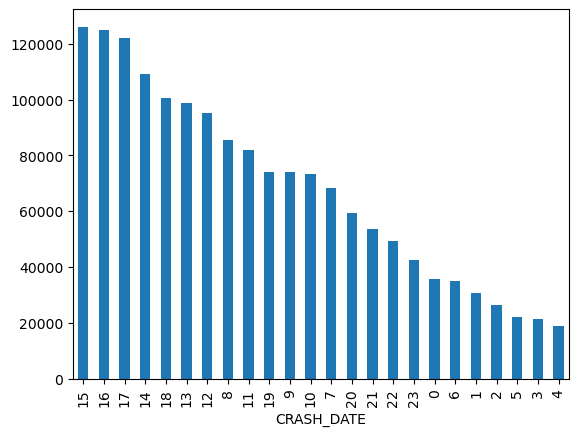

In [123]:
df['CRASH_DATE'].dt.hour.value_counts().plot(kind = 'bar');

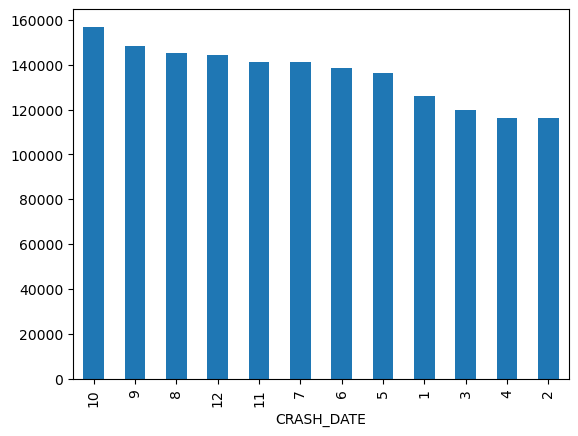

In [124]:
df['CRASH_DATE'].dt.month.value_counts().plot(kind = 'bar');

## Replace NaNs in vehicle_defect with unknown

In [125]:
df['VEHICLE_DEFECT'].replace({np.nan: 'UNKNOWN', }, inplace = True)

In [147]:
len(df['VEHICLE_DEFECT'].unique())

17

## Replace Nans in vehicle_type with unknown

In [126]:
df['VEHICLE_TYPE'].replace({np.nan: 'UNKNOWN/NA'}, inplace = True)

In [149]:
len(df['VEHICLE_TYPE'].unique())

22

## Replace NaNs in vehicle_use with unknown

In [127]:
df['VEHICLE_USE'].replace({np.nan: 'UNKNOWN/NA'}, inplace = True)

<Axes: ylabel='VEHICLE_USE'>

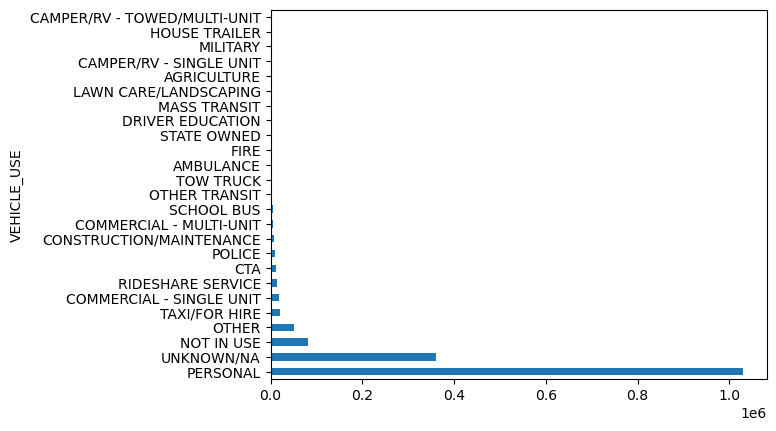

In [128]:
df['VEHICLE_USE'].value_counts().plot(kind = 'barh')

In [150]:
len(df['VEHICLE_USE'].unique())

25

In [129]:
df['MANEUVER'].replace({np.nan: 'UNKNOWN/NA'}, inplace = True)

<Axes: ylabel='MANEUVER'>

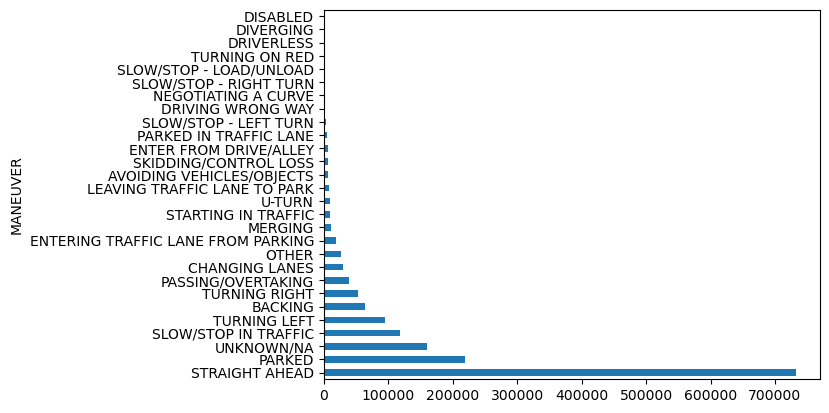

In [130]:
df['MANEUVER'].value_counts().plot(kind = 'barh')

In [151]:
len(df['MANEUVER'].unique())

28

   ## Replaced NaNs in occupant_cnt with 999

In [131]:
df['OCCUPANT_CNT'].replace({np.nan: 999}, inplace = True)

## Replaced NaNs in first_contact_point with unknown

In [132]:
df['FIRST_CONTACT_POINT'].replace({np.nan: 'UNKOWN' }, inplace = True)

In [133]:
df.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
0,1729734,8266c4c33c41836510756c5adbb9fc9780c658cbe80c7c...,2023-12-24 23:40:00,1,DRIVER,1646676.0,FORD,FLEX,NaN,NaN,UNKNOWN,PASSENGER,UNKNOWN/NA,W,BACKING,1.0,REAR
1,1729735,8266c4c33c41836510756c5adbb9fc9780c658cbe80c7c...,2023-12-24 23:40:00,2,PARKED,1646677.0,LINCOLN,MKX,IL,2010.0,UNKNOWN,SPORT UTILITY VEHICLE (SUV),PERSONAL,W,PARKED,0.0,FRONT
2,1736580,f7c706b7ba93e1d7e6dee3f1904ac47221cf81810c3167...,2024-01-07 03:07:00,1,DRIVER,1653244.0,TOYOTA,CAMRY,IL,1995.0,UNKNOWN,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,2.0,FRONT-LEFT-CORNER
3,1736581,f7c706b7ba93e1d7e6dee3f1904ac47221cf81810c3167...,2024-01-07 03:07:00,2,DRIVER,1653247.0,VOLKSWAGEN,TIGUAN,IL,2022.0,NONE,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,1.0,REAR-RIGHT-CORNER
4,1736941,567e8399c28784f6ded076c975c8be0cdffa412c812a21...,2024-01-07 18:54:00,1,DRIVER,1653594.0,TESLA,MODEL Y,IL,2021.0,UNKNOWN,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,1.0,FRONT


In [152]:
len(df['FIRST_CONTACT_POINT'].unique())

24

In [156]:
cat_columns = ['UNIT_TYPE', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER',\
              'FIRST_CONTACT_POINT']

In [159]:
vehicles_dummies_df = pd.get_dummies(df, columns = cat_columns, drop_first = True, dtype = int)

In [160]:
vehicles_dummies_df.sample(5)

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,TRAVEL_DIRECTION,...,FIRST_CONTACT_POINT_SIDE-LEFT-FRONT,FIRST_CONTACT_POINT_SIDE-LEFT-REAR,FIRST_CONTACT_POINT_SIDE-RIGHT,FIRST_CONTACT_POINT_SIDE-RIGHT-FRONT,FIRST_CONTACT_POINT_SIDE-RIGHT-REAR,FIRST_CONTACT_POINT_TOP,FIRST_CONTACT_POINT_TOTAL (ALL AREAS),FIRST_CONTACT_POINT_UNDER CARRIAGE,FIRST_CONTACT_POINT_UNKNOWN,FIRST_CONTACT_POINT_UNKOWN
1119423,504018,ab6447e7c40d337f4cd68429a4a2f08a50cffde7c5d6a9...,2018-10-19 20:12:00,1,481808.0,HONDA,CRV,NJ,2008.0,W,...,0,0,0,0,0,0,0,0,0,0
1494723,868814,cf1736bd1764d7f8c5e4a2e589a1c5b79635868449606f...,2020-04-02 13:00:00,2,824326.0,HYUNDAI,ACCENT,IL,2013.0,N,...,0,0,0,0,0,0,0,0,0,0
1415405,792180,eb6c92c0d838024c94f8d4fe71c53945d5a93facb2faef...,2019-11-29 15:10:00,1,752292.0,"TOYOTA MOTOR COMPANY, LTD.",UNKNOWN,IL,1993.0,W,...,0,0,0,0,0,0,0,0,0,1
1257751,63953,26b9eb4b76c486dc2f4484012b647698b9717324a91042...,2016-08-05 09:57:00,1,61863.0,HYUNDAI,SONATA,IL,2016.0,N,...,0,0,0,0,0,0,0,0,0,0
1588288,959620,38b31ae36b98410180be820ddd3ca0b88bd0f4b7bebf31...,2020-09-17 01:00:00,1,909508.0,UNKNOWN,MOTORIZED,NaN,NaN,UNKNOWN,...,0,0,0,0,0,0,0,0,1,0
